In [ ]:
#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install neattext
import neattext.functions as nfx

DATA PREPROCESSING:
Text cleaning (lowercasing, removing special characters, etc.).
Stopword removal.
Tokenization.
Lemmatization or stemming.

In [ ]:
df=pd.read_csv("language_detection_data_s.csv")

In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = nfx.remove_special_characters(text)
    text = nfx.remove_stopwords(text)
    text = nfx.remove_multiple_spaces(text)
    # Add more cleaning steps as needed
    return text

# Apply cleaning function to your dataset
df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [ ]:
import nltk
nltk.download('punkt')
# Tokenization
from nltk.tokenize import word_tokenize
df['Tokenized_Text'] = df['Cleaned_Text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('wordnet')
# Lemmatization (or stemming if preferred)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Text'] = df['Tokenized_Text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Remove empty rows
df = df[df['Lemmatized_Text'].apply(len) > 0]

# Reset index
df.reset_index(drop=True, inplace=True)

Step 3: Text Vectorization

Convert text data into numerical features.
Consider TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(df['Lemmatized_Text'].apply(lambda tokens: ' '.join(tokens)))


In [ ]:
# Step 10: Vectorization, Extract Unigrams
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text using unigrams
vectorizer_unigrams = CountVectorizer(max_features=5000, analyzer='word', ngram_range=(1, 1))
X_unigrams = vectorizer_unigrams.fit_transform(df['Lemmatized_Text'].apply(lambda tokens: ' '.join(tokens)))

# Step 11: Distribution of Unigrams through the languages
unigrams_distribution = X_unigrams.toarray().sum(axis=0)
print("Distribution of Unigrams through the languages:")
print(unigrams_distribution)

# Step 12: Print number of Unigrams per language
num_unigrams_per_language = X_unigrams.sum(axis=1)
df['Num_Unigrams'] = num_unigrams_per_language
print("Number of Unigrams per language:")
print(df[['Language', 'Num_Unigrams']])

# Step 25: Conclusion
# Your code for conclusion, if any


Distribution of Unigrams through the languages:
[ 26  13 112 ...   6   5  11]
Number of Unigrams per language:
      Language  Num_Unigrams
0       French            12
1       French             1
2       French            25
3       French            11
4       French            41
...        ...           ...
13146   Darija             4
13147   Darija             5
13148   Darija            10
13149   Darija            11
13150   Darija             5

[13151 rows x 2 columns]


In [ ]:
# Step 13: Get most common chars for a few European languages
# Assuming here that 'Language' column contains European languages
european_languages = ['English', 'French', 'Spanish', 'Italian', 'German']
common_chars = {}
for lang in european_languages:
    lang_indices = df[df['Language'] == lang].index
    lang_unigrams = X_unigrams[lang_indices, :]
    lang_common_chars = np.array(vectorizer_unigrams.get_feature_names_out())[np.argsort(lang_unigrams.sum(axis=0))[0, ::-1][:10]]
    common_chars[lang] = lang_common_chars

# Print most common chars for each European language
print("Most common chars for European languages:")
for lang, chars in common_chars.items():
    print(f"{lang}: {chars}")


Most common chars for European languages:
English: [['rponse' 'et' 'minen' ... 'mensonges' 'mensonge' '000']]
French: [['de' 'et' 'le' ... 'khay' 'khalid' 'letting']]
Spanish: [['zwin' 'flat' 'fire' ... 'perte' 'pervers' '000']]
Italian: [['zwin' 'flat' 'fire' ... 'perte' 'pervers' '000']]
German: [['zwin' 'flat' 'fire' ... 'perte' 'pervers' '000']]


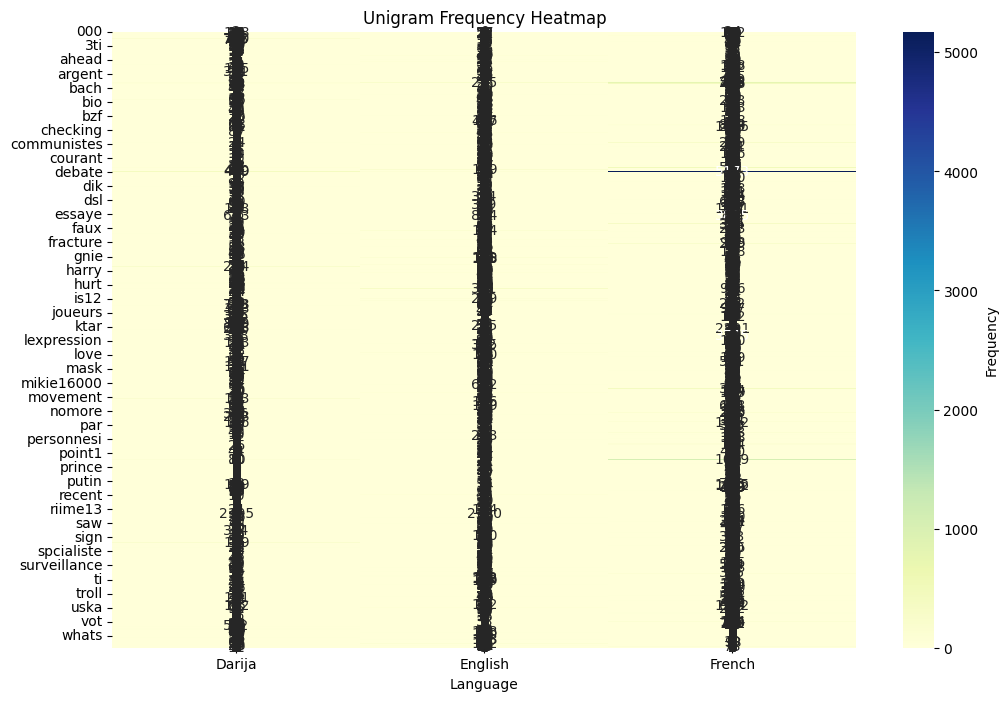

In [ ]:
# Step 14: Collect and sort chars, build data, build dataframe, plot heatmap
chars_data = pd.DataFrame(X_unigrams.toarray(), columns=vectorizer_unigrams.get_feature_names_out())
chars_data['Language'] = df['Language']

# Group by Language and sum the frequencies of each character
grouped_chars = chars_data.groupby('Language').sum()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_chars.T, cmap="YlGnBu", annot=True, fmt='.0f', cbar_kws={'label': 'Frequency'})
plt.title('Unigram Frequency Heatmap')
plt.show()


In [ ]:
# Step 16: Bi-grams
vectorizer_bigrams = CountVectorizer(max_features=5000, analyzer='word', ngram_range=(2, 2))
X_bigrams = vectorizer_bigrams.fit_transform(df['Lemmatized_Text'].apply(lambda tokens: ' '.join(tokens)))

# Step 17: Number of bigrams
num_bigrams_per_language = X_bigrams.sum(axis=1)
df['Num_Bigrams'] = num_bigrams_per_language
print("Number of Bigrams per language:")
print(df[['Language', 'Num_Bigrams']])

# Step 18: Top bigrams (>1%) for each language
threshold = int(0.01 * X_bigrams.shape[1])
top_bigrams_indices = np.argsort(X_bigrams.sum(axis=0))[0, ::-1][:threshold]
top_bigrams = np.array(vectorizer_bigrams.get_feature_names_out())[top_bigrams_indices]
print(f"Top {threshold} Bigrams:")
print(top_bigrams)

Number of Bigrams per language:
      Language  Num_Bigrams
0       French            5
1       French            0
2       French           25
3       French            5
4       French           15
...        ...          ...
13146   Darija            1
13147   Darija            2
13148   Darija            2
13149   Darija            3
13150   Darija            2

[13151 rows x 2 columns]
Top 50 Bigrams:
[['et autres' 'janven rponse' '2021en rponse' ... 'musique et' 'comme tu'
  'franceinter et']]


In [ ]:
# Step 22: Unique features per language
unique_features_per_language = {}
for lang in df['Language'].unique():
    lang_indices = df[df['Language'] == lang].index
    lang_mixture = X_mixture_top1Percent[lang_indices, :].toarray()
    lang_unique_features = [feature for i, feature in enumerate(vectorizer_mixture_top1Percent.get_feature_names_out()) if lang_mixture[:, i].sum() > 0]
    unique_features_per_language[lang] = lang_unique_features

In [ ]:
# Assuming you have already run the previous code to create X_mixture_top1Percent and unique_features_per_language
# Add this code to get the output

# Print unique features per language
for lang, unique_features in unique_features_per_language.items():
    print(f'Language: {lang}')
    print(f'Unique Features: {unique_features}')
    print('---')

In [ ]:
print(X_mixture_top1Percent)
print(unique_features_per_language)


  (0, 4997)	1
  (0, 4621)	1
  (0, 1490)	1
  (0, 748)	2
  (0, 3671)	1
  (0, 764)	1
  (0, 4806)	1
  (0, 1134)	1
  (0, 2689)	1
  (0, 1781)	1
  (0, 2409)	1
  (1, 4621)	1
  (2, 4621)	1
  (2, 1490)	2
  (2, 1134)	3
  (2, 2409)	1
  (2, 412)	1
  (2, 932)	1
  (2, 1182)	1
  (2, 3411)	1
  (2, 308)	1
  (2, 3744)	1
  (2, 4652)	1
  (2, 1341)	1
  (2, 990)	1
  :	:
  (13148, 227)	1
  (13148, 2716)	1
  (13148, 3702)	1
  (13148, 99)	1
  (13148, 146)	1
  (13148, 145)	1
  (13148, 1327)	1
  (13148, 44)	1
  (13148, 2402)	1
  (13149, 3906)	1
  (13149, 2716)	1
  (13149, 266)	1
  (13149, 99)	1
  (13149, 1637)	1
  (13149, 2539)	1
  (13149, 2408)	1
  (13149, 446)	1
  (13149, 44)	1
  (13149, 2402)	1
  (13149, 113)	1
  (13150, 2716)	1
  (13150, 43)	1
  (13150, 2764)	1
  (13150, 2402)	1
  (13150, 2087)	1
{}


In [ ]:
# Step 7: Dominant vocabulary in Darija
darija_indices = df[df['Language'] == 'Darija'].index
darija_unigrams = X_unigrams[darija_indices, :]
darija_common_words = np.array(vectorizer_unigrams.get_feature_names_out())[np.argsort(darija_unigrams.sum(axis=0))[0, ::-1][:10]]
print("Dominant Vocabulary in Darija:")
print(darija_common_words)

# Step 8: Dominant vocabulary in English
english_indices = df[df['Language'] == 'English'].index
english_unigrams = X_unigrams[english_indices, :]
english_common_words = np.array(vectorizer_unigrams.get_feature_names_out())[np.argsort(english_unigrams.sum(axis=0))[0, ::-1][:10]]
print("Dominant Vocabulary in English:")
print(english_common_words)

# Step 9: Dataset partition (training & testing data)
X_train, X_test, y_train, y_test = train_test_split(X, df['Language'], test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)


Dominant Vocabulary in Darija:
[['rponse' 'khoya' 'janven' ... 'holding' 'run' 'letting']]
Dominant Vocabulary in English:
[['rponse' 'et' 'minen' ... 'mensonges' 'mensonge' '000']]
Shape of Training Data: (10520, 5000)
Shape of Testing Data: (2631, 5000)


In [ ]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

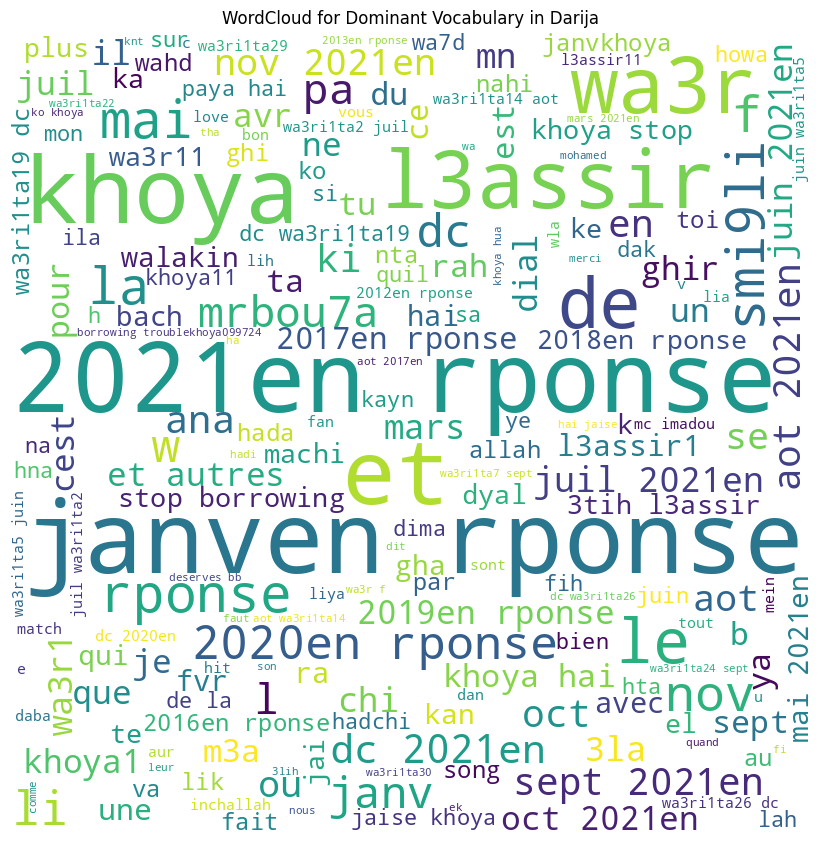

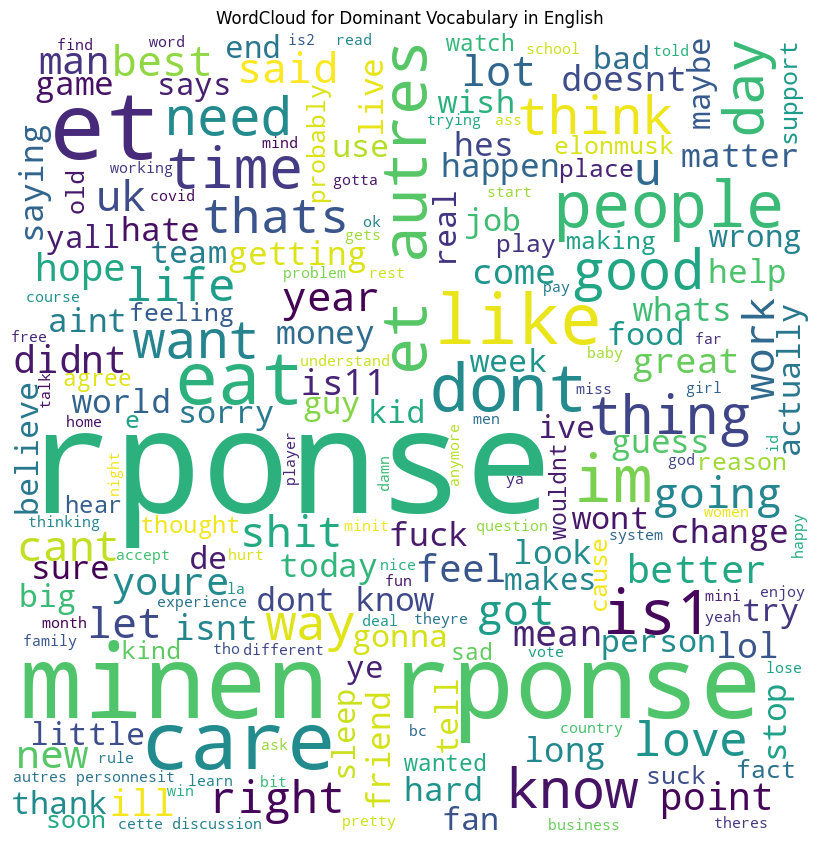

In [ ]:
# Step 7: Dominant Vocabulary in Darija using WordCloud
darija_text = ' '.join(df[df['Language'] == 'Darija']['Cleaned_Text'])
plot_wordcloud(darija_text, "WordCloud for Dominant Vocabulary in Darija")

# Step 8: Dominant Vocabulary in English using WordCloud
english_text = ' '.join(df[df['Language'] == 'English']['Cleaned_Text'])
plot_wordcloud(english_text, "WordCloud for Dominant Vocabulary in English")

# Step 9: Dataset Partition (Training & Testing Data)
# Assuming X, y are already defined (features and labels)
X_train, X_test, y_train, y_test = train_test_split(X, df['Language'], test_size=0.2, random_state=42)

# Your existing code for machine learning algorithms (Step 4) goes here

# Rest of your code remains unchanged


Step 4: Applying Machine Learning Classification Algorithm

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

different ml algorithms for choosing best

In [ ]:
# Define a list of classifiers to try
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [ ]:
# Initialize a dictionary to store evaluation results
results = {}


evaluvation of different algorithms

In [ ]:
# Loop through each classifier, fit the model, and evaluate it
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

In [ ]:
# Find the best performing classifier
best_classifier = max(results, key=lambda k: results[k]['accuracy'])
print(f"The best classifier is: {best_classifier}")
print(f"Accuracy: {results[best_classifier]['accuracy']}")

The best classifier is: Random Forest
Accuracy: 0.9714937286202965


prediction using confusion matrix

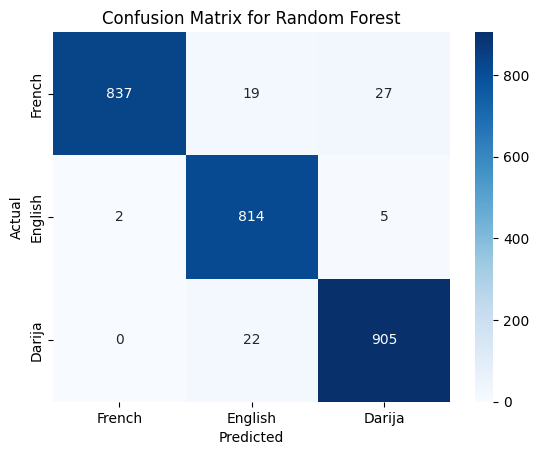

In [ ]:
# Display the confusion matrix for the best classifier
confusion_mat = results[best_classifier]['confusion_matrix']
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_classifier}')
plt.show()

In [ ]:
!pip install langid


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=1c37d25350d67087d86e4c6678e07174be3a13307bb19bce3eed921cc38c8ef7
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
# Import the langid library
import langid

# Create a function to detect the language of a text
def detect_language(text):
    return langid.classify(text)[0]

# Apply language detection to the 'Text' column in your DataFrame
df['Detected_Language'] = df['Text'].apply(detect_language)

# Print the first few rows of the DataFrame with detected languages
print(df[['Text', 'Detected_Language']].head())

# Count the number of unique detected languages
unique_detected_languages = df['Detected_Language'].nunique()
print(f"Number of unique detected languages: {unique_detected_languages}")


                                                Text Detected_Language
0   \n@ZoltanTV\n @TwitterFrance\n  et  \n@Police...                fr
1                                @TwitterFrance\n c8                en
2   \n@SanaRyuk\n @alirabeh\n  et 3 autres person...                fr
3   \n@SoBusyDear\nIl faudrait inventer la possib...                fr
4   \n@entreplume\n @PaulineLanglo15\n  et  \n@le...                fr
Number of unique detected languages: 77
